In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd


In [2]:
## impoting
df = pd.read_excel(r"C:\Users\user\Desktop\#\DA\practice\python\cleaned_covid19_data.xlsx")


In [3]:
df.head()

,Continent,Country,Population,Cases.New,Cases.Active,Cases.Critical,Cases.Recovered,Cases.1M_pop,Cases.Total,Deaths.New,Deaths.1M_pop,Deaths.Total,Tests.1M_pop,Tests.Total
0,North-America,Anguilla,15230,0,13,4,3879,256336,3904,0,788,12,3373736,51382
1,North-America,Saint-Pierre-Miquelon,5759,0,1001,1,2449,599410,3452,0,347,2,4410488,25400
2,Africa,Saint-Helena,6115,0,2164,0,2,354211,2166,0,0,0,0,0
3,South-America,Falkland-Islands,3539,0,0,0,1930,545352,1930,0,0,0,2439107,8632
4,North-America,Montserrat,4965,0,19,0,1376,282578,1403,0,1611,8,3577442,17762


C:\Users\user\AppData\Local\Temp\ipykernel_22944\1982808112.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




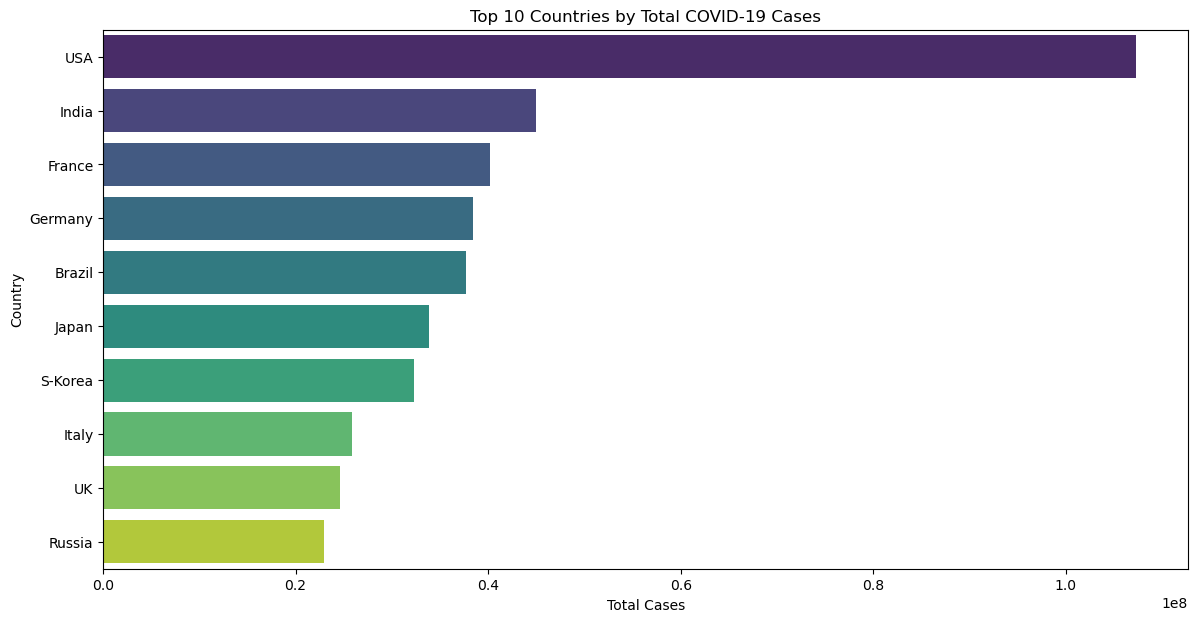

In [61]:
# Bar chart
plt.figure(figsize=(14, 7))
df_sorted = df.sort_values(by='Cases.Total', ascending=False).head(10)
sns.barplot(x='Cases.Total', y='Country', data=df_sorted, palette='viridis')
plt.xlabel('Total Cases')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.show()

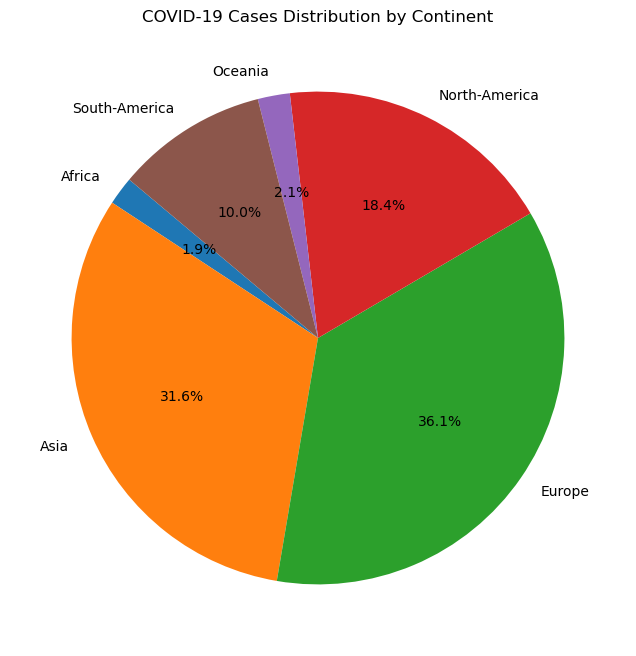

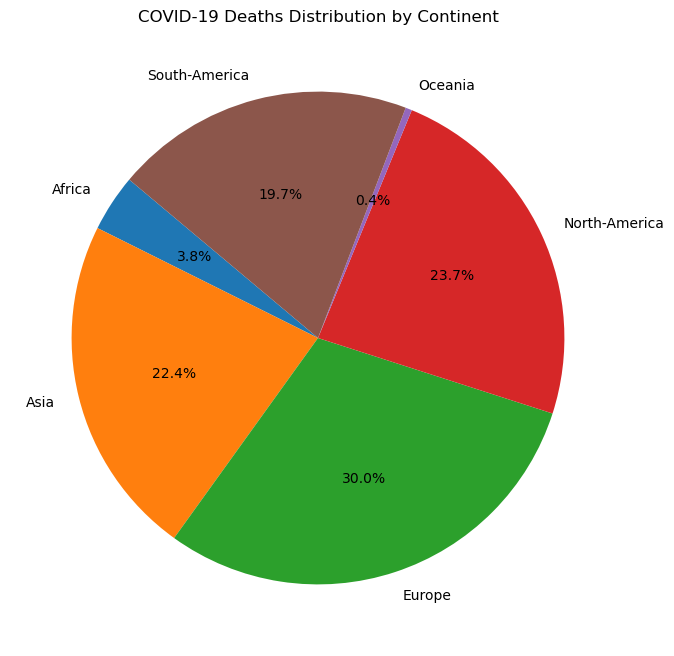

In [4]:
# Pie chart for cases
continent_cases = df.groupby('Continent')['Cases.Total'].sum()
plt.figure(figsize=(8, 8))
plt.pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Cases Distribution by Continent')
plt.show()

# Pie chart for deaths
continent_deaths = df.groupby('Continent')['Deaths.Total'].sum()
plt.figure(figsize=(8, 8))
plt.pie(continent_deaths, labels=continent_deaths.index, autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Deaths Distribution by Continent')
plt.show()

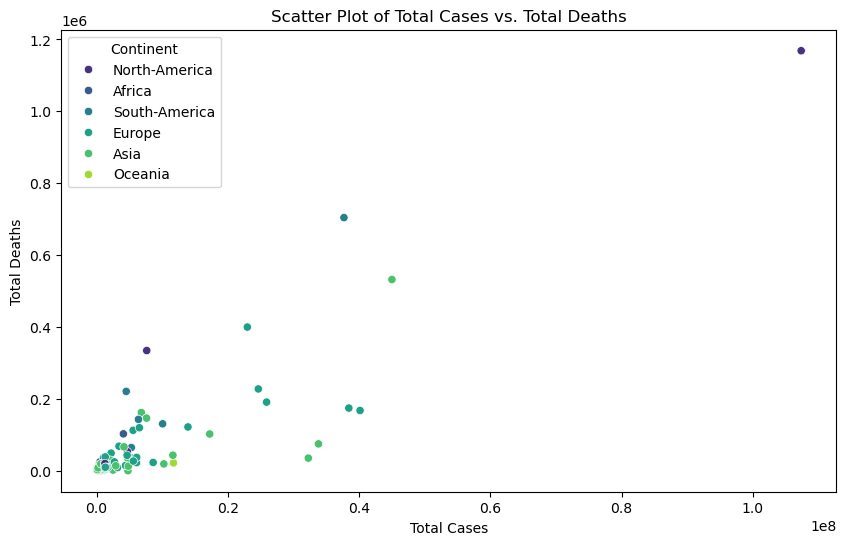

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cases.Total', y='Deaths.Total', data=df, hue='Continent', palette='viridis')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('Scatter Plot of Total Cases vs. Total Deaths')
plt.show()

In [14]:
## Bubble Chart of Cases and Deaths by Population
fig = px.scatter(df,
                 x='Cases.Total',
                 y='Deaths.Total',
                 size='Population',
                 color='Continent',
                 hover_name='Country',
                 title='Bubble Chart of Total Cases vs. Total Deaths by Population',
                 size_max=60)
fig.show()

In [18]:
fig = px.scatter_geo(df,
                     locations='Country',
                     locationmode='country names',
                     size='Cases.New',
                     hover_name='Country',
                     title='Geographical Bubble Map of New COVID-19 Cases',
                     size_max=40)
fig.show()

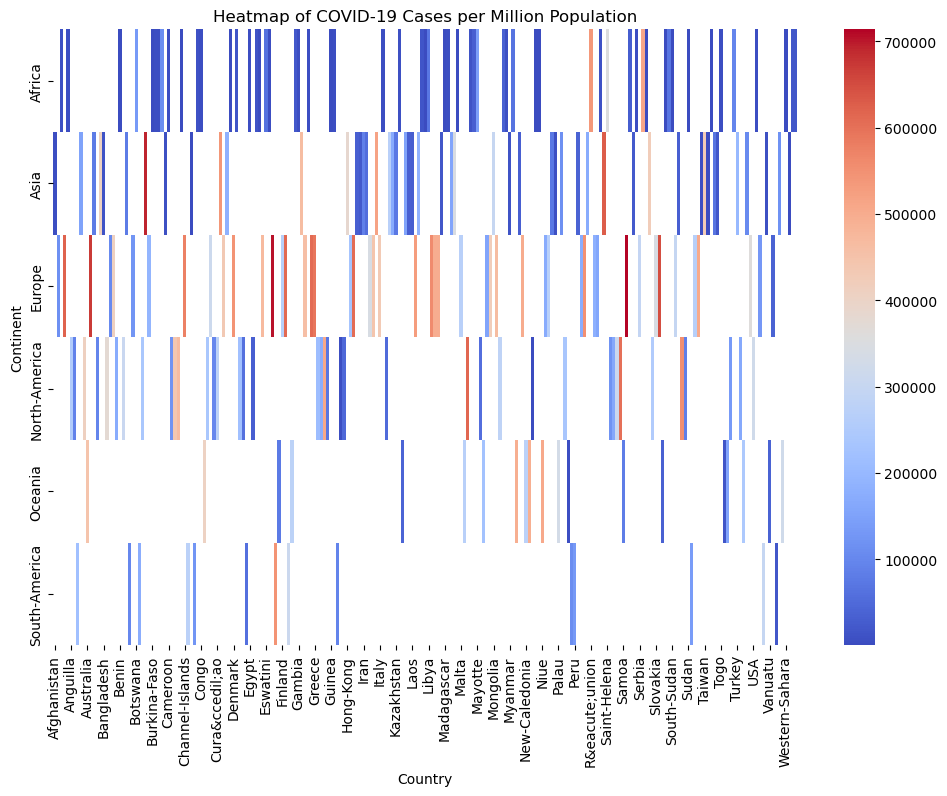

In [20]:

# Make sure you have a 'Cases.Per.Million' column
df['Cases.Per.Million'] = df['Cases.1M_pop']

# Create a pivot table for the heatmap
pivot_table = df.pivot(index='Continent', columns='Country', values='Cases.Per.Million')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)  # Set annot=True if you want to see the values in the cells
plt.title('Heatmap of COVID-19 Cases per Million Population')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17772\1877357925.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_testing.index, y='Tests.Per.Million', data=continent_testing, palette='coolwarm')


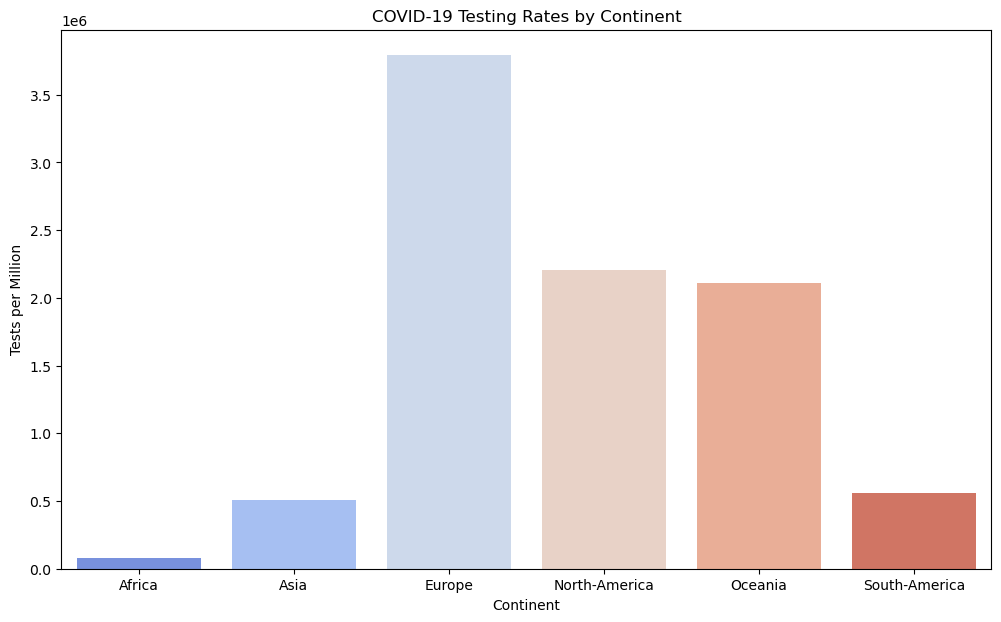

In [6]:
## COVID-19 Testing Rates by Continent
# Aggregation by Continent
continent_testing = df.groupby('Continent').agg({
    'Tests.Total': 'sum',
    'Population': 'sum'
})
continent_testing['Tests.Per.Million'] = continent_testing['Tests.Total'] / (continent_testing['Population'] / 1_000_000)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=continent_testing.index, y='Tests.Per.Million', data=continent_testing, palette='coolwarm')
plt.xlabel('Continent')
plt.ylabel('Tests per Million')
plt.title('COVID-19 Testing Rates by Continent')
plt.show()


<Figure size 1200x700 with 0 Axes>

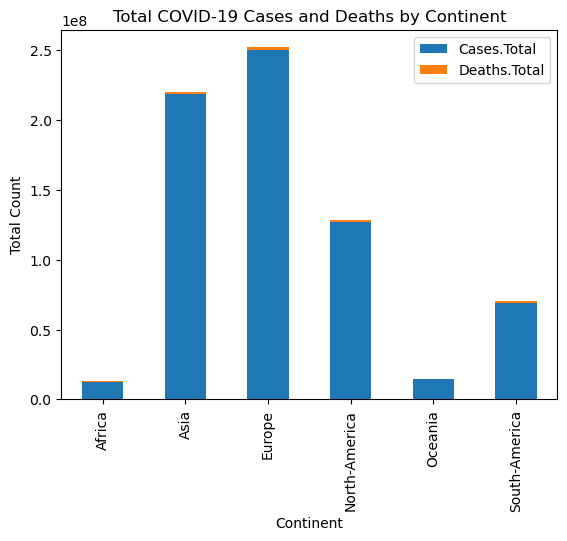

In [22]:
#  COVID-19 Cases and Deaths by Continent
# Aggregation by Continent
continent_summary = df.groupby('Continent').agg({
    'Cases.Total': 'sum',
    'Deaths.Total': 'sum'
}).reset_index()

# Plot
plt.figure(figsize=(12, 7))
continent_summary.plot(kind='bar', x='Continent', stacked=True)
plt.xlabel('Continent')
plt.ylabel('Total Count')
plt.title('Total COVID-19 Cases and Deaths by Continent')
plt.show()

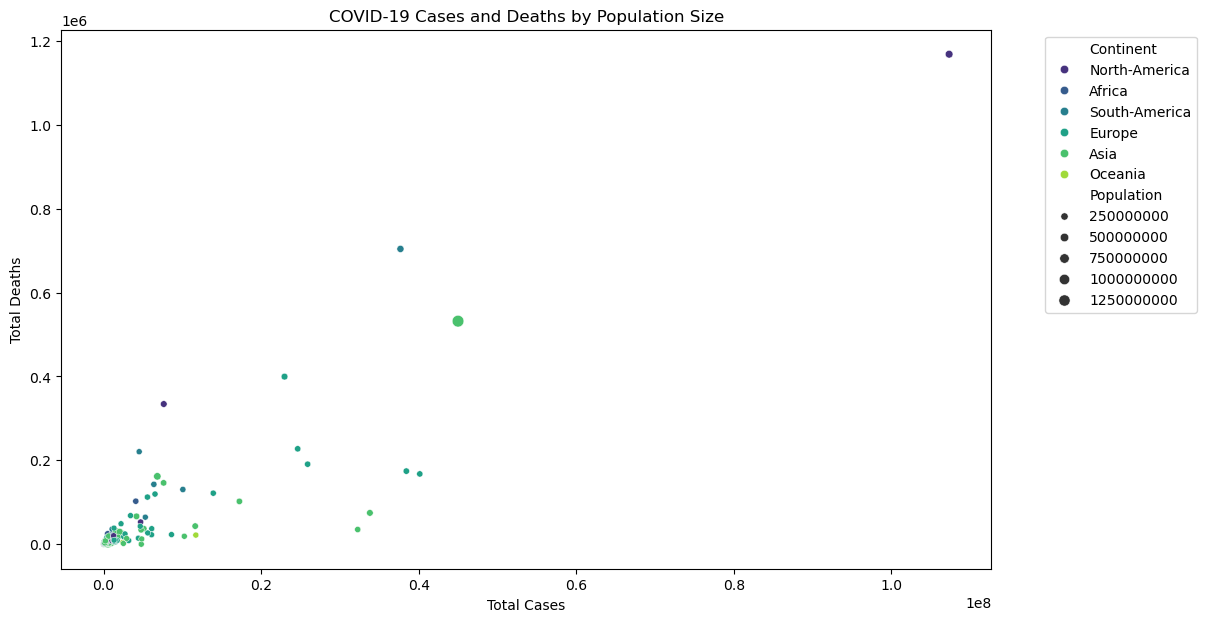

In [7]:
#  COVID-19 Cases and Deaths by Population Size

# Scatter plot with population size as the size parameter
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Cases.Total', y='Deaths.Total', size='Population', hue='Continent', palette='viridis', data=df)
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('COVID-19 Cases and Deaths by Population Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

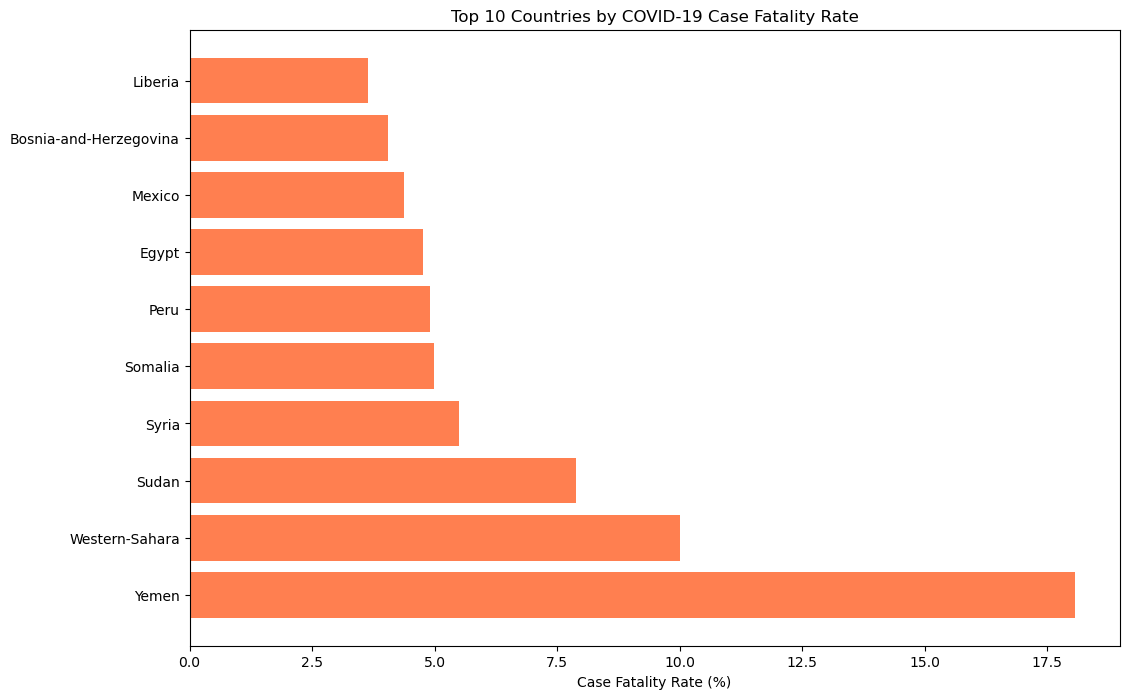

In [24]:
# COVID-19 Case Fatality Rate by Country
# Calculate Case Fatality Rate
df['Case.Fatality.Rate'] = df['Deaths.Total'] / df['Cases.Total'] * 100

# Plot
plt.figure(figsize=(12, 8))
top_countries = df.sort_values(by='Case.Fatality.Rate', ascending=False).head(10)
plt.barh(top_countries['Country'], top_countries['Case.Fatality.Rate'], color='coral')
plt.xlabel('Case Fatality Rate (%)')
plt.title('Top 10 Countries by COVID-19 Case Fatality Rate')
plt.show()

In [8]:
 #COVID-19 Cases and Deaths Distribution Across Countries
# Distribution plot
fig = px.histogram(df, x='Cases.Total', color='Continent', marginal='rug', title='Distribution of COVID-19 Cases Across Countries')
fig.show()

fig = px.histogram(df, x='Deaths.Total', color='Continent', marginal='rug', title='Distribution of COVID-19 Deaths Across Countries')
fig.show()

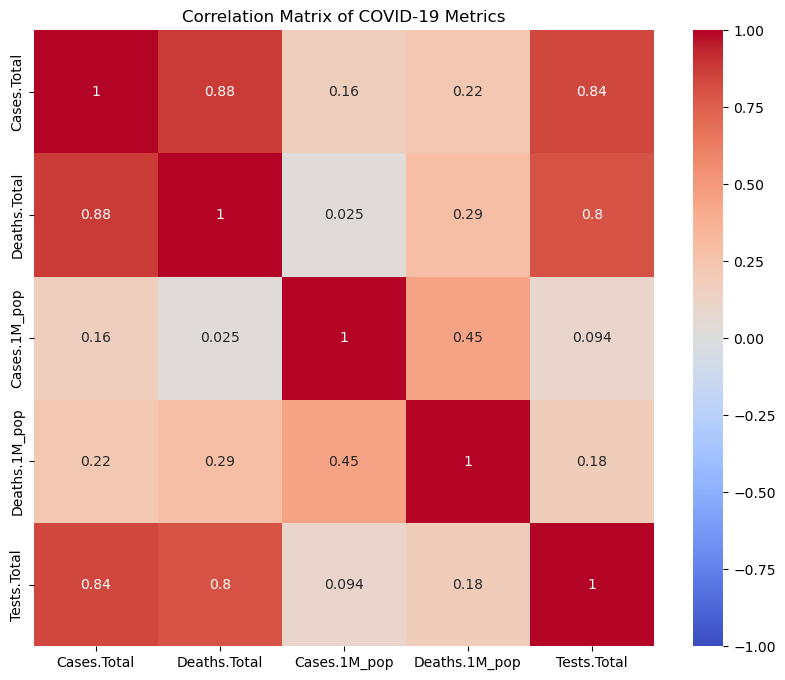

In [26]:
#  Correlation Matrix Heatmap
# Calculate correlations
correlation_matrix = df[['Cases.Total', 'Deaths.Total', 'Cases.1M_pop', 'Deaths.1M_pop', 'Tests.Total']].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()

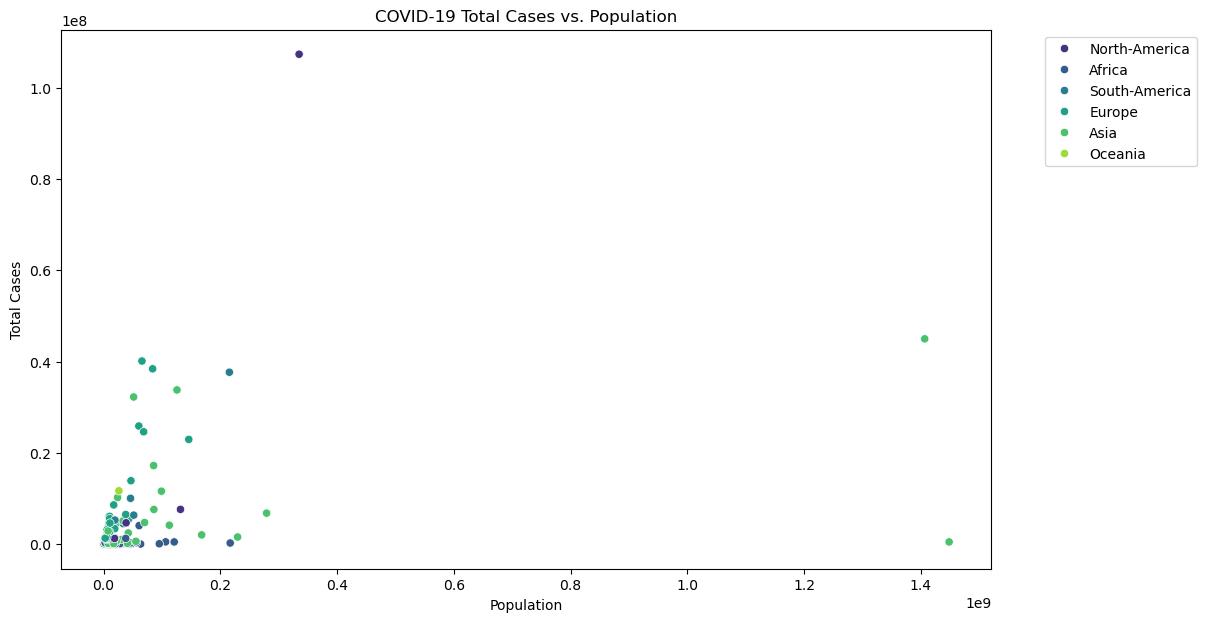

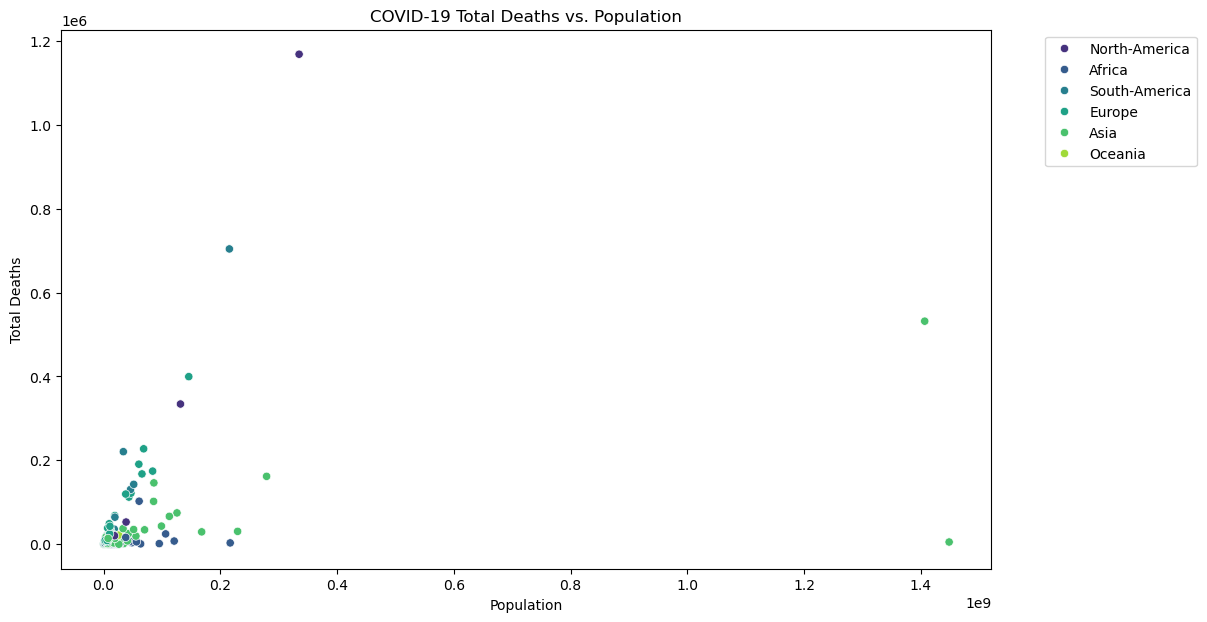

In [9]:
## COVID-19 Cases and Deaths by Population Density
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Population', y='Cases.Total', hue='Continent', palette='viridis', data=df)
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.title('COVID-19 Total Cases vs. Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot comparing COVID-19 deaths to population
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Population', y='Deaths.Total', hue='Continent', palette='viridis', data=df)
plt.xlabel('Population')
plt.ylabel('Total Deaths')
plt.title('COVID-19 Total Deaths vs. Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

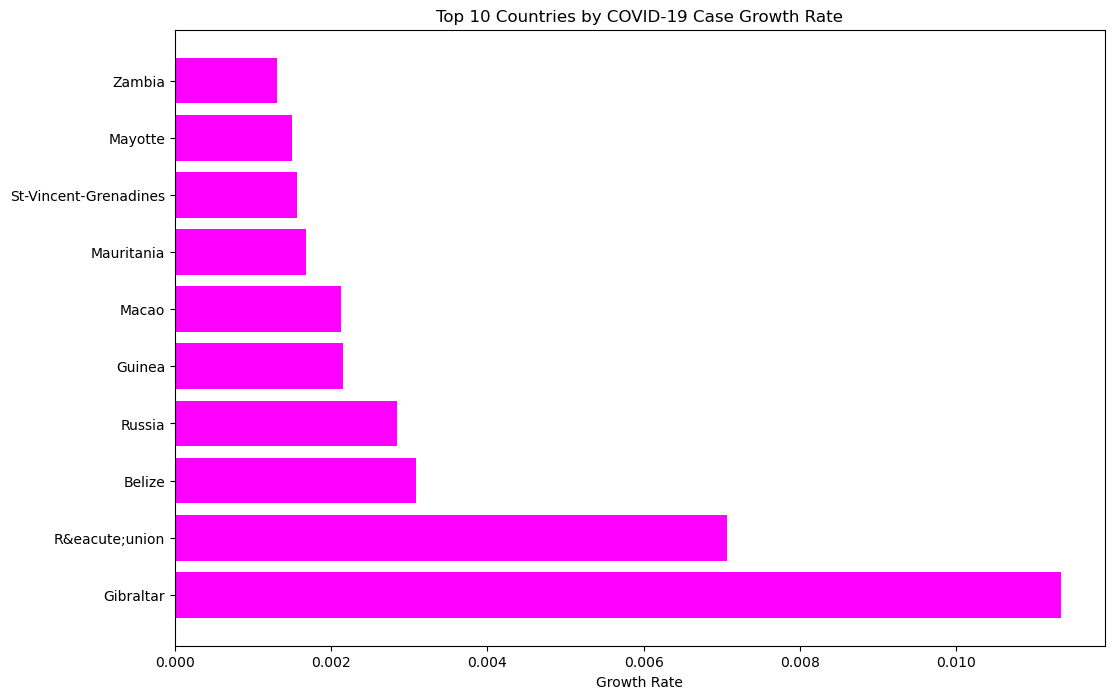

In [28]:
#Top Countries with Highest Growth Rate of Cases
# Calculate daily growth rate of cases
df['Growth.Rate'] = df['Cases.New'] / df['Cases.Total'].shift(1)

# Plot
top_growth = df.sort_values(by='Growth.Rate', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_growth['Country'], top_growth['Growth.Rate'], color='magenta')
plt.xlabel('Growth Rate')
plt.title('Top 10 Countries by COVID-19 Case Growth Rate')
plt.show()

In [10]:
#  COVID-19 Cases and Deaths per Continent
# Aggregate by Continent
continent_summary = df.groupby('Continent').agg({
    'Cases.Total': 'sum',
    'Deaths.Total': 'sum'
}).reset_index()

# Plot
fig = px.bar(continent_summary, x='Continent', y=['Cases.Total', 'Deaths.Total'],
             title='COVID-19 Cases and Deaths per Continent', barmode='group')
fig.show()

In [31]:
# Top 10 countries by cases
top_10_countries = df.nlargest(10, 'Cases.Total')

# Plot
fig = px.bar(top_10_countries, x='Country', y='Cases.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Cases')
fig.show()

In [11]:
# Top 10 countries by deaths
top_10_countries_deaths = df.nlargest(10, 'Deaths.Total')

# Plot
fig = px.bar(top_10_countries_deaths, x='Country', y='Deaths.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Deaths')
fig.show()

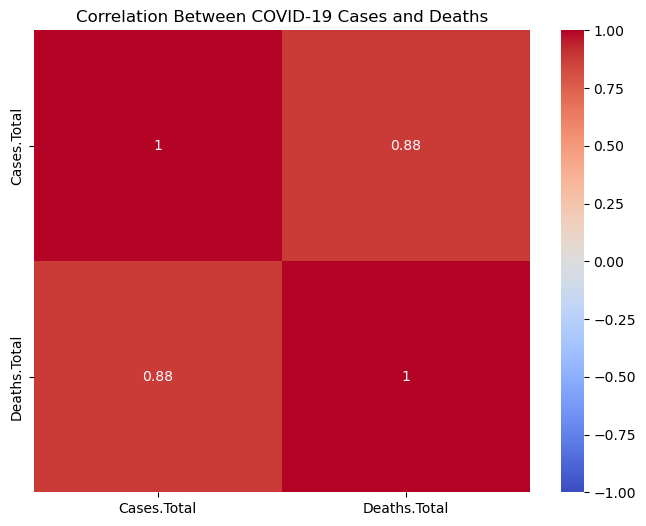

In [33]:
# Correlation Between Cases and Deaths Across Countries

# Correlation
correlation = df[['Cases.Total', 'Deaths.Total']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between COVID-19 Cases and Deaths')
plt.show()

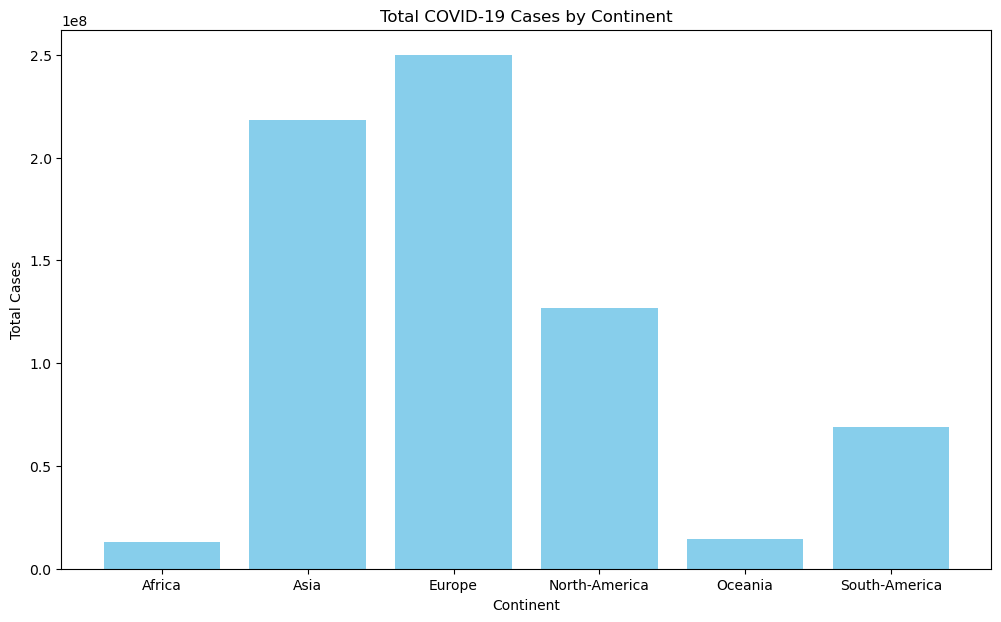

In [12]:
#  COVID-19 Cases by Continent with Bar Chart
# Aggregation by Continent
continent_summary = df.groupby('Continent').agg({
    'Cases.Total': 'sum'
}).reset_index()

# Plot
plt.figure(figsize=(12, 7))
plt.bar(continent_summary['Continent'], continent_summary['Cases.Total'], color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by Continent')
plt.show()

# Dashboard

In [13]:
# importing the neccesary libraries
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import dash
from dash import dcc, html

In [14]:
# Creatng the Dashboard application
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("COVID-19 Dashboard"),
    
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='continent-dropdown',
                options=[{'label': continent, 'value': continent} for continent in df['Continent'].unique()],
                value=df['Continent'].unique()[0]
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': country, 'value': country} for country in df['Country'].unique()],
                value=df['Country'].unique()[0]
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-time-series'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-continent-pie'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-scatter'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-density'),
    ]),
    
    html.Div([
        dcc.Graph(id='top-10-countries-cases'),
    ]),
    
    html.Div([
        dcc.Graph(id='top-10-countries-deaths'),
    ]),
])

# Callbacks to update the graphs based on the dropdowns
@app.callback(
    [dash.dependencies.Output('cases-deaths-time-series', 'figure'),
     dash.dependencies.Output('cases-deaths-continent-pie', 'figure'),
     dash.dependencies.Output('cases-deaths-scatter', 'figure'),
     dash.dependencies.Output('cases-deaths-density', 'figure'),
     dash.dependencies.Output('top-10-countries-cases', 'figure'),
     dash.dependencies.Output('top-10-countries-deaths', 'figure')],
    [dash.dependencies.Input('continent-dropdown', 'value'),
     dash.dependencies.Input('country-dropdown', 'value')]
)
def update_graphs(selected_continent, selected_country):
    # Filter the dataframe based on the selected continent and country
    filtered_df = df[df['Continent'] == selected_continent]
    country_df = df[df['Country'] == selected_country]
    
    # Create the figures
    cases_deaths_time_series = go.Figure()
    cases_deaths_time_series.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Cases.Total'], mode='lines', name='Total Cases'))
    cases_deaths_time_series.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Deaths.Total'], mode='lines', name='Total Deaths'))
    cases_deaths_time_series.update_layout(title='COVID-19 Cases and Deaths Over Time')
    
    cases_deaths_continent_pie = px.pie(filtered_df, names='Continent', values='Cases.Total', title='Distribution of COVID-19 Cases by Continent')
    
    cases_deaths_scatter = px.scatter(filtered_df, x='Population', y='Cases.Total', color='Continent', title='COVID-19 Cases vs. Population')
    
    cases_deaths_density = px.density_contour(filtered_df, x='Cases.Total', y='Deaths.Total', color='Continent', title='Density Plot of COVID-19 Cases and Deaths')
    
    top_10_countries_cases = px.bar(df.nlargest(10, 'Cases.Total'), x='Country', y='Cases.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Cases')
    
    top_10_countries_deaths = px.bar(df.nlargest(10, 'Deaths.Total'), x='Country', y='Deaths.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Deaths')
    
    return cases_deaths_time_series, cases_deaths_continent_pie, cases_deaths_scatter, cases_deaths_density, top_10_countries_cases, top_10_countries_deaths

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File c:\Users\user\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:3805, in Index.get_loc(
    self=Index(['Continent', 'Country', 'Population', 'Ca...op',
       'Tests.Total'],
      dtype='object'),
    key='Date'
)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
        casted_key = 'Date'
        self = Index(['Continent', 'Country', 'Population', 'Cases.New', 'Cases.Active',
       'Cases.Critical', 'Cases.Recovered', 'Cases.1M_pop', 'Cases.Total',
       'Deaths.New', 'Deaths.1M_pop', 'Deaths.Total', 'Tests.1M_pop',
       'Tests.Total'],
      dtype='object')
   3806 except KeyError as err:

File index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas\\_libs\\hashtable_class_helper.pxi:7081, in pandas._libs.hashtable.PyObjec

In [15]:
# Create a Dash application
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("COVID-19 Dashboard"),
    
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='continent-dropdown',
                options=[{'label': continent, 'value': continent} for continent in df['Continent'].unique()],
                value=df['Continent'].unique()[0]
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': country, 'value': country} for country in df['Country'].unique()],
                value=df['Country'].unique()[0]
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-pie'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-scatter'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-density'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-per-million-bar'),
    ]),
    
    html.Div([
        dcc.Graph(id='top-10-countries-cases'),
    ]),
    
    html.Div([
        dcc.Graph(id='top-10-countries-deaths'),
    ]),
])

# Callbacks to update the graphs based on the dropdowns
@app.callback(
    [dash.dependencies.Output('cases-deaths-pie', 'figure'),
     dash.dependencies.Output('cases-deaths-scatter', 'figure'),
     dash.dependencies.Output('cases-deaths-density', 'figure'),
     dash.dependencies.Output('cases-per-million-bar', 'figure'),
     dash.dependencies.Output('top-10-countries-cases', 'figure'),
     dash.dependencies.Output('top-10-countries-deaths', 'figure')],
    [dash.dependencies.Input('continent-dropdown', 'value'),
     dash.dependencies.Input('country-dropdown', 'value')]
)
def update_graphs(selected_continent, selected_country):
    # Filter the dataframe based on the selected continent and country
    filtered_df = df[df['Continent'] == selected_continent]
    country_df = df[df['Country'] == selected_country]
    
    # Create the figures
    cases_deaths_pie = px.pie(filtered_df, names='Country', values='Cases.Total', title='Distribution of COVID-19 Cases by Country')
    
    cases_deaths_scatter = px.scatter(filtered_df, x='Population', y='Cases.Total', color='Continent', title='COVID-19 Cases vs. Population')
    
    cases_deaths_density = px.density_contour(filtered_df, x='Cases.Total', y='Deaths.Total', color='Continent', title='Density Plot of COVID-19 Cases and Deaths')
    
    cases_per_million_bar = px.bar(filtered_df.sort_values(by='Cases.1M_pop', ascending=False).head(10), x='Country', y='Cases.1M_pop', color='Continent', title='Top 10 Countries by Cases per Million Population')
    
    top_10_countries_cases = px.bar(df.nlargest(10, 'Cases.Total'), x='Country', y='Cases.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Cases')
    
    top_10_countries_deaths = px.bar(df.nlargest(10, 'Deaths.Total'), x='Country', y='Deaths.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Deaths')
    
    return cases_deaths_pie, cases_deaths_scatter, cases_deaths_density, cases_per_million_bar, top_10_countries_cases, top_10_countries_deaths

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [16]:
# Creating a Dash application
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("COVID-19 Dashboard"),
    
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='continent-dropdown',
                options=[{'label': continent, 'value': continent} for continent in df['Continent'].unique()],
                value=df['Continent'].unique()[0]
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': country, 'value': country} for country in df['Country'].unique()],
                value=df['Country'].unique()[0]
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-by-country-bar'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-map'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-treemap'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-bubble-chart'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-histogram'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-scatter'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-density'),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-per-million-bar'),
    ]),
    
    html.Div([
        dcc.Graph(id='top-10-countries-cases'),
    ]),
    
    html.Div([
        dcc.Graph(id='top-10-countries-deaths'),
    ]),
])

# Callbacks to update the graphs based on the dropdowns
@app.callback(
    [dash.dependencies.Output('cases-by-country-bar', 'figure'),
     dash.dependencies.Output('cases-map', 'figure'),
     dash.dependencies.Output('cases-treemap', 'figure'),
     dash.dependencies.Output('cases-bubble-chart', 'figure'),
     dash.dependencies.Output('cases-histogram', 'figure'),
     dash.dependencies.Output('cases-deaths-scatter', 'figure'),
     dash.dependencies.Output('cases-deaths-density', 'figure'),
     dash.dependencies.Output('cases-per-million-bar', 'figure'),
     dash.dependencies.Output('top-10-countries-cases', 'figure'),
     dash.dependencies.Output('top-10-countries-deaths', 'figure')],
    [dash.dependencies.Input('continent-dropdown', 'value'),
     dash.dependencies.Input('country-dropdown', 'value')]
)
def update_graphs(selected_continent, selected_country):
    # Filter the dataframe based on the selected continent and country
    filtered_df = df[df['Continent'] == selected_continent]
    country_df = df[df['Country'] == selected_country]
    
    # Create the figures
    cases_by_country_bar = px.bar(filtered_df.sort_values(by='Cases.Total', ascending=False).head(10), x='Country', y='Cases.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Cases')

    cases_map = px.choropleth(filtered_df, locations='Country', locationmode='country names', color='Cases.Total', color_continuous_scale='Viridis', title='COVID-19 Cases by Country')

    cases_treemap = px.treemap(filtered_df, path=['Continent', 'Country'], values='Cases.Total', color='Cases.Total', color_continuous_scale='Viridis', title='Treemap of COVID-19 Cases by Country')

    cases_bubble_chart = px.scatter(filtered_df, x='Country', y='Cases.Total', size='Cases.Total', color='Continent', title='Bubble Chart of COVID-19 Cases by Country')

    cases_histogram = px.histogram(filtered_df, x='Cases.Total', nbins=20, title='Histogram of COVID-19 Cases Distribution')

    cases_deaths_scatter = px.scatter(filtered_df, x='Population', y='Cases.Total', color='Continent', title='COVID-19 Cases vs. Population')

    cases_deaths_density = px.density_contour(filtered_df, x='Cases.Total', y='Deaths.Total', color='Continent', title='Density Plot of COVID-19 Cases and Deaths')

    cases_per_million_bar = px.bar(filtered_df.sort_values(by='Cases.1M_pop', ascending=False).head(10), x='Country', y='Cases.1M_pop', color='Continent', title='Top 10 Countries by Cases per Million Population')

    top_10_countries_cases = px.bar(df.nlargest(10, 'Cases.Total'), x='Country', y='Cases.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Cases')

    top_10_countries_deaths = px.bar(df.nlargest(10, 'Deaths.Total'), x='Country', y='Deaths.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Deaths')
    
    return cases_by_country_bar, cases_map, cases_treemap, cases_bubble_chart, cases_histogram, cases_deaths_scatter, cases_deaths_density, cases_per_million_bar, top_10_countries_cases, top_10_countries_deaths

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [17]:
# Create a Dash application
app = dash.Dash(__name__)

# Layout of the dashboard with custom styling
app.layout = html.Div(style={'backgroundColor': '#f0f2f5', 'padding': '20px'}, children=[
    html.H1("COVID-19 Dashboard", style={'textAlign': 'center', 'color': '#333'}),

    html.Div([
        html.Div([
            dcc.Dropdown(
                id='continent-dropdown',
                options=[{'label': continent, 'value': continent} for continent in df['Continent'].unique()],
                value=df['Continent'].unique()[0],
                style={'color': '#000', 'backgroundColor': '#fff'}
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': country, 'value': country} for country in df['Country'].unique()],
                value=df['Country'].unique()[0],
                style={'color': '#000', 'backgroundColor': '#fff'}
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-by-country-bar', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-map', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-treemap', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-bubble-chart', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-histogram', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-scatter', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-deaths-density', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='cases-per-million-bar', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='top-10-countries-cases', style={'margin': '20px 0'}),
    ]),
    
    html.Div([
        dcc.Graph(id='top-10-countries-deaths', style={'margin': '20px 0'}),
    ]),
])

# Callbacks to update the graphs based on the dropdowns
@app.callback(
    [dash.dependencies.Output('cases-by-country-bar', 'figure'),
     dash.dependencies.Output('cases-map', 'figure'),
     dash.dependencies.Output('cases-treemap', 'figure'),
     dash.dependencies.Output('cases-bubble-chart', 'figure'),
     dash.dependencies.Output('cases-histogram', 'figure'),
     dash.dependencies.Output('cases-deaths-scatter', 'figure'),
     dash.dependencies.Output('cases-deaths-density', 'figure'),
     dash.dependencies.Output('cases-per-million-bar', 'figure'),
     dash.dependencies.Output('top-10-countries-cases', 'figure'),
     dash.dependencies.Output('top-10-countries-deaths', 'figure')],
    [dash.dependencies.Input('continent-dropdown', 'value'),
     dash.dependencies.Input('country-dropdown', 'value')]
)
def update_graphs(selected_continent, selected_country):
    # Filter the dataframe based on the selected continent and country
    filtered_df = df[df['Continent'] == selected_continent]
    country_df = df[df['Country'] == selected_country]
    
    # Create the figures
    cases_by_country_bar = px.bar(filtered_df.sort_values(by='Cases.Total', ascending=False).head(10), x='Country', y='Cases.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Cases')

    cases_map = px.choropleth(filtered_df, locations='Country', locationmode='country names', color='Cases.Total', color_continuous_scale='Viridis', title='COVID-19 Cases by Country')

    cases_treemap = px.treemap(filtered_df, path=['Continent', 'Country'], values='Cases.Total', color='Cases.Total', color_continuous_scale='Viridis', title='Treemap of COVID-19 Cases by Country')

    cases_bubble_chart = px.scatter(filtered_df, x='Country', y='Cases.Total', size='Cases.Total', color='Continent', title='Bubble Chart of COVID-19 Cases by Country')

    cases_histogram = px.histogram(filtered_df, x='Cases.Total', nbins=20, title='Histogram of COVID-19 Cases Distribution')

    cases_deaths_scatter = px.scatter(filtered_df, x='Population', y='Cases.Total', color='Continent', title='COVID-19 Cases vs. Population')

    cases_deaths_density = px.density_contour(filtered_df, x='Cases.Total', y='Deaths.Total', color='Continent', title='Density Plot of COVID-19 Cases and Deaths')

    cases_per_million_bar = px.bar(filtered_df.sort_values(by='Cases.1M_pop', ascending=False).head(10), x='Country', y='Cases.1M_pop', color='Continent', title='Top 10 Countries by Cases per Million Population')

    top_10_countries_cases = px.bar(df.nlargest(10, 'Cases.Total'), x='Country', y='Cases.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Cases')

    top_10_countries_deaths = px.bar(df.nlargest(10, 'Deaths.Total'), x='Country', y='Deaths.Total', color='Continent', title='Top 10 Countries by Total COVID-19 Deaths')
    
    return cases_by_country_bar, cases_map, cases_treemap, cases_bubble_chart, cases_histogram, cases_deaths_scatter, cases_deaths_density, cases_per_million_bar, top_10_countries_cases, top_10_countries_deaths

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)